In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

from Brands import Sonites
from Analyzer import Analyzer

move_mkt_weights = {
    "Explorers": 0.6,
    "Shoppers": 0,
    "Professionals": 0.2,
    "High Earners": 0.2,
    "Savers": 0
}


an = Analyzer(marketing_mix_segment_weights=move_mkt_weights, last_period=2)

son = Sonites()



#df_semantic_forecast = an.compute_forecast_df(an.df_semantic_ideal)

semantic_centroid = an.compute_centroid(an.df_semantic_ideal, period=2)


df_marketing_mixes = son.obtain_marketing_mixes(capped=False)
df_marketing_mixes



,Explorers,Shoppers,Professionals,High Earners,Savers
MARKET : Sonites,,,,,
MOST,0.086735,0.285714,0.086735,0.086735,0.454082
MOVE,0.414634,0.097561,0.195122,0.195122,0.097561
ROBUDO,0.090226,0.421053,0.090226,0.090226,0.308271
ROCK,0.092308,0.092308,0.338462,0.384615,0.092308
SOFT,0.149758,0.251208,0.149758,0.149758,0.299517
SOLO,0.202899,0.275362,0.173913,0.173913,0.173913
TONE,0.302326,0.149502,0.122924,0.302326,0.122924
TOPS,0.302682,0.122605,0.302682,0.122605,0.149425


In [2]:
for brand in df_marketing_mixes.index:
    
    weights = df_marketing_mixes.loc[brand].values
    semantic_centroid = an.compute_centroid(an.df_semantic_ideal, period=2, weights=weights)

    brand_semantic = son.obtain_semantic(brand=brand)

    distance = an.distance_from_centroids(df_observations=brand_semantic, df_centroids=semantic_centroid)

    print(brand)
    #print("weights")
    #print(weights)
    #print("semantic_centroid")
    #print(semantic_centroid)
    #print("brand_semantic.values")
    #print(brand_semantic.values)
    print(distance[3])
    print()
    


MOST
{'MOST': {'centroid': 0.6309908388631111}}

MOVE
{'MOVE': {'centroid': 0.7554399339680471}}

ROBUDO
{'ROBUDO': {'centroid': 0.7996194146162173}}

ROCK
{'ROCK': {'centroid': 0.707762957379769}}

SOFT
{'SOFT': {'centroid': 0.6068035709227682}}

SOLO
{'SOLO': {'centroid': 0.7653072277035055}}

TONE
{'TONE': {'centroid': 0.6921316733020388}}

TOPS
{'TOPS': {'centroid': 0.7530720321674964}}



In [3]:
df_comprehensive_feat = son.obtain_comprehensive_df_features()
df_comprehensive_feat

,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price,Economy,Performance,Convenience
MOST,2.11,2.34,3.31,1.61,1.5,2.36,10.92,-17.52,-9.92
MOVE,4.26,1.88,5.93,3.05,3.17,4.83,-5.52,-5.78,-7.16
ROBUDO,2.11,4.77,2.39,4.22,3.18,2.82,7.9,-3.38,0.18
ROCK,4.7,6.37,6.47,5.93,5.07,5.7,-11.3,8.84,14.82
SOFT,1.73,1.63,3.31,1.61,1.55,2.28,11.46,-16.24,-13.48
SOLO,1.73,3.23,4,2.07,2.86,4.36,-2.38,-9.16,-5.1
TONE,5.32,6.5,5.12,4.52,5.61,5.88,-12.52,8.56,16.36
TOPS,3.16,1.63,1.84,6.32,6.05,5.11,-7.42,14.22,-14.5
Explorers_2,4.55,1.91,5.82,5.91,6.13,3.7,2.02,13.74,-6.96
High Earners_2,3.27,6.37,3.55,4.47,4.78,5.57,-10.44,4.56,9.98


{'MOST': 0, 'MOVE': 0, 'ROBUDO': 0, 'ROCK': 2, 'SOFT': 0, 'SOLO': 0, 'TONE': 2, 'TOPS': 1, 'Explorers_2': 1, 'High Earners_2': 2, 'Professionals_2': 2, 'Savers_2': 0, 'Shoppers_2': 0}


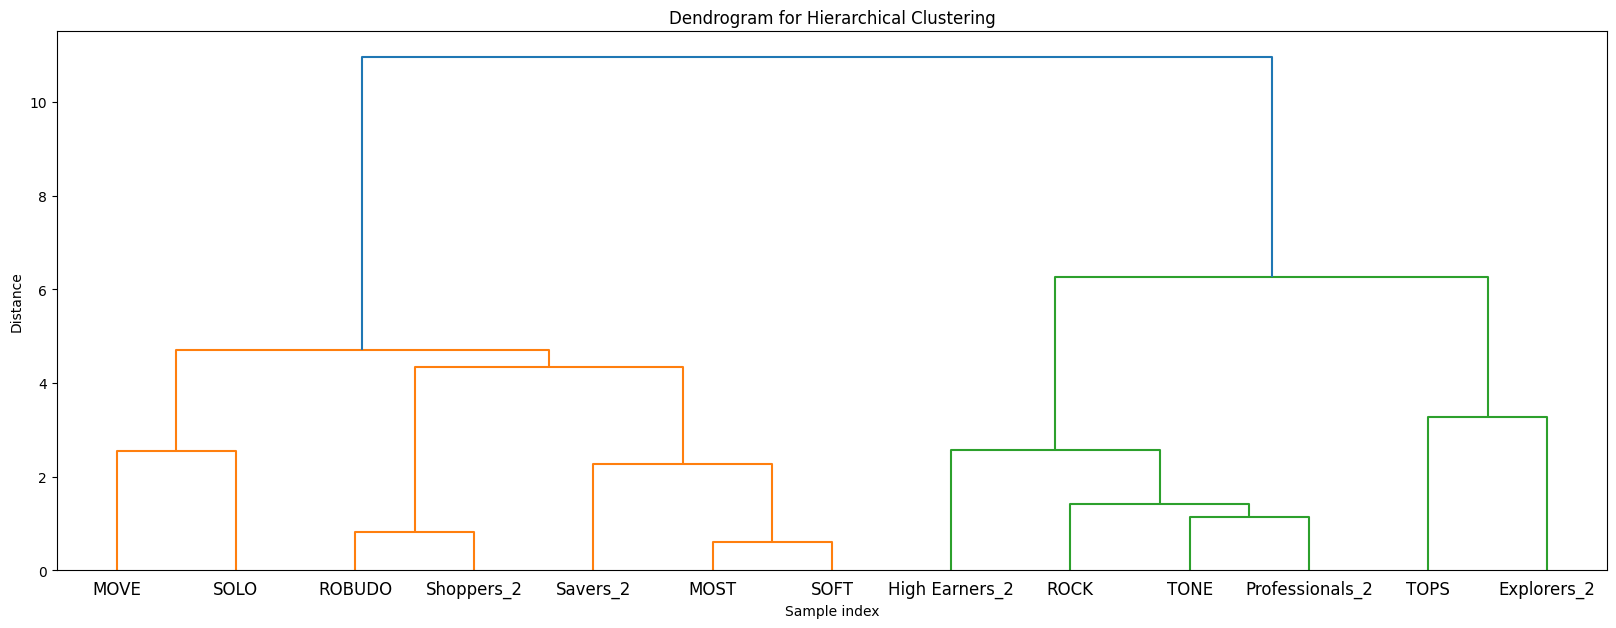

In [4]:
from Clustering import HierarchicalClustering

data = df_comprehensive_feat

hc = HierarchicalClustering(data, n_clusters=3, linkage_method='ward', scale_data=True)

labels = hc.get_cluster_dict_labels()
print(labels)

hc.plot_dendrogram()

In [14]:
hc.get_cluster_centroids()[2].sum(axis=1)

Feature_1   -0.347637
Feature_2   -0.831062
Feature_3   -0.335477
Feature_4    0.021256
Feature_5   -0.017994
Feature_6   -0.433153
Feature_7    0.432767
Feature_8   -0.007439
Feature_9   -0.836779
dtype: float64

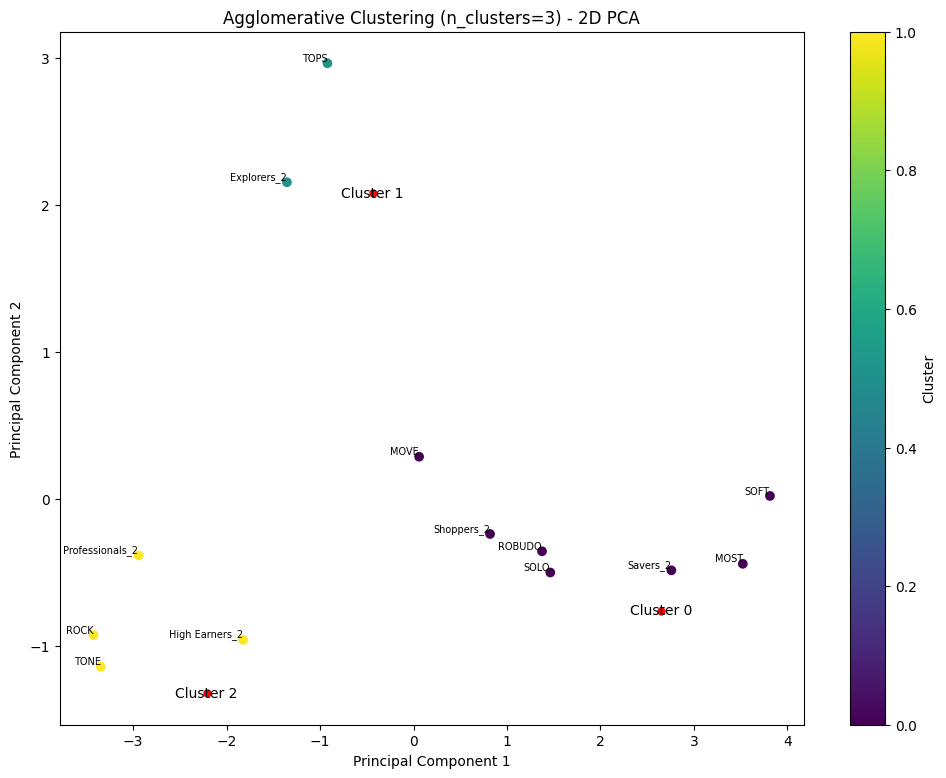

In [6]:
hc.plot_clusters()

In [7]:


distances = an.distance_from_centroids(df_observations=son.most_semantic, df_centroids=semantic_centroid)
distances[0]


{'MOST': {'centroid': array([1.874137931034483, 2.0106130268199234, 1.0609195402298846,
         3.376513409961685, 3.466091954022988, 1.7382758620689658],
        dtype=object)}}

In [8]:
son.df_segments_semantic

,Segment,Period,# Features,Design Index,Battery Life,Display Size,Proc. Power,Price
Index,,,,,,,,
Explorers_2,Explorers,2,4.55,1.91,5.82,5.91,6.13,3.7
High Earners_2,High Earners,2,3.27,6.37,3.55,4.47,4.78,5.57
Professionals_2,Professionals,2,5.32,5.85,5.03,5.54,5.43,5.23
Savers_2,Savers,2,2.58,3.9,1.78,2.73,2.25,2.13
Shoppers_2,Shoppers,2,1.87,4.97,2.9,4.27,4.05,3.02
Explorers_1,Explorers,1,4.65,1.8,6.03,5.99,6.25,3.54
High Earners_1,High Earners,1,3.27,6.38,3.57,4.64,4.83,5.59
Professionals_1,Professionals,1,5.56,5.85,5.05,5.46,5.28,5
Savers_1,Savers,1,2.53,3.89,1.75,2.58,2.22,2.14


In [9]:
all_sonites_distances = an.distance_from_centroids(df_observations=son.df_sonites_semantic, df_centroids=son.df_segments_semantic)
all_sonites_distances[3]

{'MOST': {'Explorers_2': 0.5036224532331863,
  'High Earners_2': 0.48042111068460236,
  'Professionals_2': 0.44451016488499107,
  'Savers_2': 0.8559858755982217,
  'Shoppers_2': 0.6919463301759522,
  'Explorers_1': 0.4954186081984583,
  'High Earners_1': 0.4733232477500605,
  'Professionals_1': 0.4643868878605645,
  'Savers_1': 0.86110971882784,
  'Shoppers_1': 0.6999077995045757,
  'Explorers_0': 0.48603130361696345,
  'High Earners_0': 0.4649813405250295,
  'Professionals_0': 0.4854032576315356,
  'Savers_0': 0.8653627111588871,
  'Shoppers_0': 0.7110477524563199},
 'MOVE': {'Explorers_2': 0.6822110114087632,
  'High Earners_2': 0.6753162536445776,
  'Professionals_2': 0.6679436193817425,
  'Savers_2': 0.6326003769827775,
  'Shoppers_2': 0.680919831084708,
  'Explorers_1': 0.6654987636831433,
  'High Earners_1': 0.670215971173657,
  'Professionals_1': 0.6777252584047351,
  'Savers_1': 0.6316182043147487,
  'Shoppers_1': 0.6897198435120221,
  'Explorers_0': 0.6490134732641246,
  'High